# Importing Libraries & Data Load

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib


In [2]:
file_path = r"Data/Prediction_Data.xlsx"

In [3]:
sheet_name = 'vw_ChurnData'

In [4]:
df = pd.read_excel(file_path, sheet_name=sheet_name)

In [5]:
df.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,11098-MAD,Female,30,Yes,Madhya Pradesh,0,31,Deal 1,Yes,No,...,Bank Withdrawal,95.099998,6683.399902,0.00,0,631.719971,7315.120117,Stayed,Others,Others
1,11114-PUN,Male,51,No,Punjab,5,9,Deal 5,Yes,No,...,Bank Withdrawal,49.150002,169.050003,0.00,10,122.370003,301.420013,Churned,Competitor,Competitor had better devices
2,11167-WES,Female,43,Yes,West Bengal,3,28,Deal 1,Yes,Yes,...,Bank Withdrawal,116.050003,8297.500000,42.57,110,1872.979980,10237.910156,Stayed,Others,Others
3,11179-MAH,Male,35,No,Maharashtra,10,12,NaN,Yes,No,...,Credit Card,84.400002,5969.299805,0.00,0,219.389999,6188.689941,Stayed,Others,Others
4,11180-TAM,Male,75,Yes,Tamil Nadu,12,27,Deal 2,Yes,No,...,Credit Card,72.599998,4084.350098,0.00,140,332.079987,4556.430176,Stayed,Others,Others


# Data Preprocessing

In [ ]:
# Drop columns that won't be used for prediction
df = df.drop(['Customer_ID','Churn_Category','Churn_Reason'],axis=1)

In [8]:
# List of columns to be label encoded
columns_to_encode = [
    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
    'Payment_Method'
]


In [9]:
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

df['Customer_Status'] = df['Customer_Status'].map(
    {
        'Stayed': 0,
        'Churned':1
    }
)

In [10]:
# Split data into features and target
X = df.drop('Customer_Status', axis=1)
y = df['Customer_Status']


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Model

In [12]:
# Initialize the model
rf = RandomForestClassifier(n_estimators=100,random_state=42)

In [13]:
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

# Evaluate Model

In [14]:
# Make Prediction
y_pred = rf.predict(X_test)

In [17]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[807  55]
 [122 218]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       862
           1       0.80      0.64      0.71       340

    accuracy                           0.85      1202
   macro avg       0.83      0.79      0.81      1202
weighted avg       0.85      0.85      0.85      1202



In [18]:
# Feature Selection using Feature Importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]


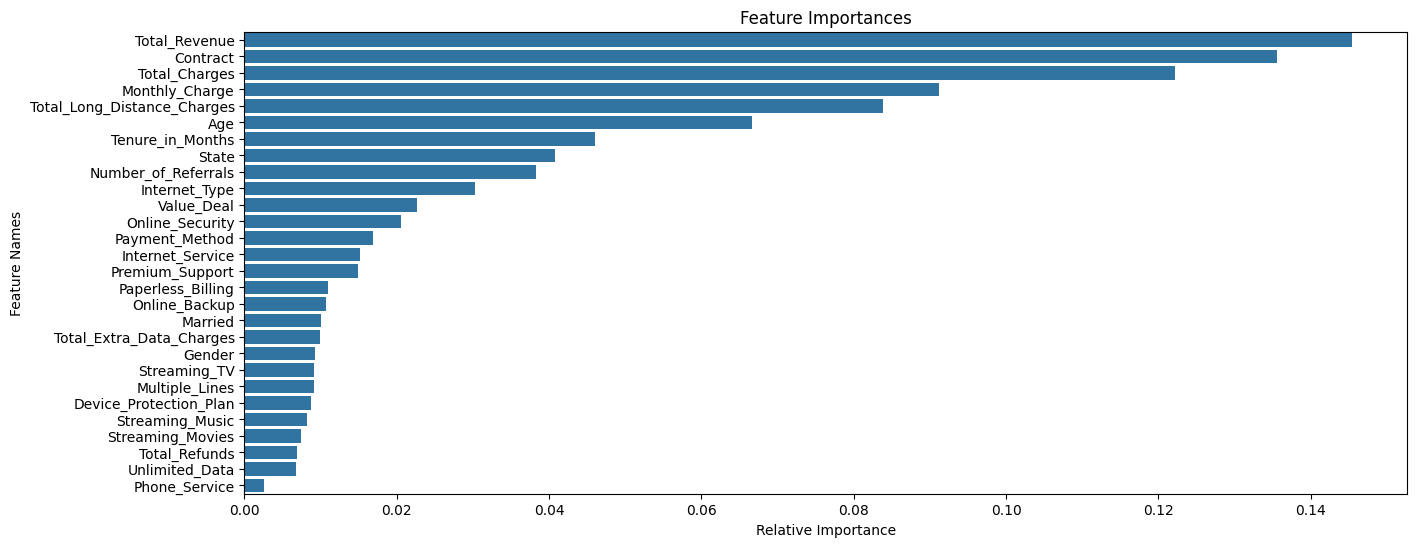

In [19]:
# Plot the feature importances
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()


# Use Model for Prediction on New Data

In [20]:
file_path = r"Data/Prediction_Data.xlsx"

sheet_name = 'vw_JoinData'

new_df = pd.read_excel(file_path, sheet_name=sheet_name)

In [21]:
new_df.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,14567-TAM,Male,43,No,Tamil Nadu,1,9,NaN,Yes,No,...,Credit Card,20.350000,20.350000,0.0,0,44.090000,64.440002,Joined,Others,Others
1,18027-UTT,Female,58,Yes,Uttar Pradesh,15,30,Deal 5,Yes,No,...,Credit Card,19.900000,33.700001,0.0,0,7.640000,41.340000,Joined,Others,Others
2,21642-TEL,Male,60,Yes,Telangana,12,29,NaN,Yes,No,...,Bank Withdrawal,54.500000,54.500000,0.0,0,33.209999,87.709999,Joined,Others,Others
3,24696-BIH,Female,69,Yes,Bihar,0,20,Deal 5,Yes,No,...,Bank Withdrawal,43.950001,85.099998,0.0,0,38.180000,123.279999,Joined,Others,Others
4,29371-WES,Female,23,No,West Bengal,14,9,Deal 5,Yes,No,...,Bank Withdrawal,55.299999,108.650002,0.0,0,87.860001,196.509995,Joined,Others,Others


In [ ]:
# Retain the original DataFrame to preserve unencoded columns
original_df = new_df.copy()

In [23]:
# Retain the Customer_ID column
customer_ids = new_df['Customer_ID']


In [24]:
# Drop columns that won't be used for prediction in the encoded DataFrame
new_data = new_df.drop(
    [
    'Customer_ID', 
    'Customer_Status', 
    'Churn_Category', 
    'Churn_Reason'],
    axis=1
)


In [26]:
# Encode categorical variables using the saved label encoders
for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] = label_encoders[column].transform(new_data[column])


In [27]:
new_predictions = rf.predict(new_data)

In [28]:
original_df['Customer_Status_Predicted'] = new_predictions

In [29]:
# Filter the DataFrame to include only records predicted as "Churned"
original_df = original_df[original_df['Customer_Status_Predicted'] == 1]


In [30]:
# Save the results
original_df.to_csv(r"Data/Predictions.csv", index=False)
